# Using simulation to answer statistical problems

In this notebook, we use numerical simulation to answer a sample of textbook statistical questions.  The main library we use is Python's numpy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Generate 10,000 samples of size 30 from an exponential distribution with rate λ = 1. Simulate the distribution of the sample mean. What does the distribution look like?

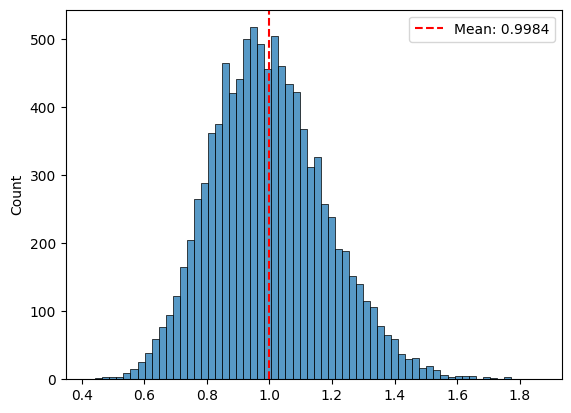

In [2]:
rng = np.random.default_rng(seed=42) #instantiate a generator object
lbmda = 1
size = 30
number_of_samples = 10000

# sample_mean = []
# for _ in range(number_of_samples):
#     sample = rng.exponential(1/lbmda, size=30)
#     sample_mean.append(np.mean(sample))

sample = rng.exponential(scale=1/lbmda, size=(number_of_samples,size)) #using numpy vectorization is faster than a for loop
sample_mean = np.mean(sample, axis=1)

avg = np.mean(sample_mean)

g=sns.histplot(sample_mean)
g.axvline(avg,color='red', linestyle='--', label=f"Mean: {avg:.4f}")
g.legend()


Given a dataset of 100 values sampled from a skewed distribution (e.g., log-normal), estimate a 95% confidence interval for the median using bootstrap resampling.

In [3]:
rng = np.random.default_rng(seed=42)
dataset = rng.lognormal(mean=0,sigma=1,size=100)
bootstrap_median = []
for _ in range(10000):
    bootstrap_sample = rng.choice(dataset,size=(100,),replace=True)
    bootstrap_median.append(np.median(bootstrap_sample))

# g=sns.histplot(bootstrap_median)

median = np.median(dataset)
ci = [np.quantile(bootstrap_median, 0.025), np.quantile(bootstrap_median, 0.975)]


Suppose you have two samples:

A = np.array([5.1, 4.9, 5.0, 5.2, 5.1])

B = np.array([5.5, 5.7, 5.6, 5.4, 5.6])

Use a permutation test to estimate the p-value for the null hypothesis that the two groups have the same mean.

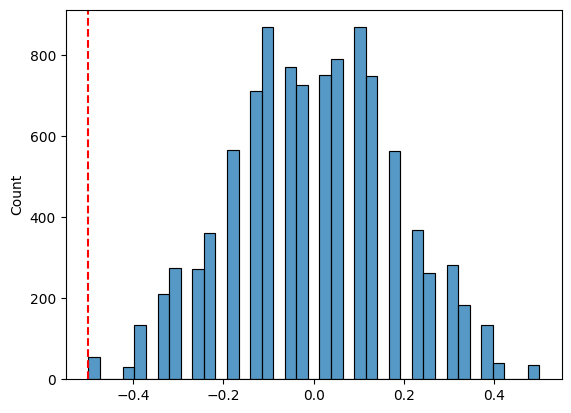

p-value: 0.0067


In [4]:
A = np.array([5.1, 4.9, 5.0, 5.2, 5.1])
B = np.array([5.5, 5.7, 5.6, 5.4, 5.6])

rng = np.random.default_rng(seed=42)
combined = np.concatenate([A, B])
avg_observed = A.mean() - B.mean()

avg_distribution = []
for _ in range(10000):
    shuffled = rng.permutation(combined)
    shuffled_A = shuffled[:len(A)]
    shuffled_B = shuffled[len(A):]
    avg_distribution.append(shuffled_A.mean() - shuffled_B.mean())

g = sns.histplot(avg_distribution)
g.axvline(avg_observed, color='red', linestyle='--', label=f"observed diff: {avg_observed:.2f}")
plt.show()

# calculate the p-value
ans = np.sum(np.abs(avg_distribution) >= np.abs(avg_observed))
p_val = ans / len(avg_distribution)
print(f"p-value: {p_val}")

# avg_distribution = np.array(avg_distribution) # to do boolean indexing, we need to convert the python list into a numpy array
# avg_distribution[avg_distribution < avg_observed] 


There are two 6-sided dices. If you roll them together, what is the probability of rolling a 7?

This question is easy to work out analytically. But we will solve it with a numerical simulation.

In [22]:
rng = np.random.default_rng(seed=42)
sides = np.arange(6) + 1
number_of_samples = 10000
   
die = rng.choice(sides, size=(2,number_of_samples)) # 2 dice, rolled over many simulations
total = np.sum(die, axis=0)

pr_7 = np.sum(total == 7) / number_of_samples

print(f"Probablity of obtaining 7: {pr_7}")

Probablity of obtaining 7: 0.1656
